In [1]:
## Import necessary packages
import pandas as pd
import numpy as np
## Import data stored on local machine 
data = pd.read_csv('Wine_data_V2.csv',sep="\t")
data


,Wine ref,Alcohol %,Total Sulfur,Residual Sugar,Quality,Class
0,1,19.046,1123.50,20.8850,11,1
1,2,17.931,966.89,25.7460,8,1
2,3,19.047,1351.20,8.7366,6,1
3,4,16.395,1293.90,14.2490,3,1
4,5,17.792,1226.60,40.8580,0,1
...,...,...,...,...,...,...
995,996,18.591,707.67,619.7300,74,3
996,997,19.303,542.96,606.8100,77,3
997,998,17.802,149.20,617.6600,93,3
998,999,19.246,724.79,621.6600,93,3


In [2]:
data.columns

Index(['Wine ref ', 'Alcohol %', 'Total Sulfur', 'Residual Sugar', 'Quality',
       'Class'],
      dtype='object')

In [3]:
## Create data headers list 
data_headers_list =data.columns.tolist()

In [4]:
data.head()

,Wine ref,Alcohol %,Total Sulfur,Residual Sugar,Quality,Class
0,1,19.046,1123.50,20.8850,11,1
1,2,17.931,966.89,25.7460,8,1
2,3,19.047,1351.20,8.7366,6,1
3,4,16.395,1293.90,14.2490,3,1
4,5,17.792,1226.60,40.8580,0,1


In [5]:
## Import necessary libraries for PCA 
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.io as pio
pio.renderers.default = "notebook"

In [6]:
### select the data we are interested in
## select dat that we want to perform PCA on
data_var_select=['Alcohol %', 'Total Sulfur', 'Residual Sugar', 'Quality'] 
## Create new dataframe with selected variables to perfrom PCA on 
data_pca_input = data[data_var_select]
## Normalising the data
data_scaled=(data_pca_input-data_pca_input.mean())/data_pca_input.std()




In [7]:
data_scaled.describe()

,Alcohol %,Total Sulfur,Residual Sugar,Quality
count,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,8.526513e-17,2.842171e-17,0.000000,-1.136868e-16
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
min,-2.968253e+00,-2.936144e+00,-1.868539,-1.672585e+00
25%,-6.845608e-01,-6.492653e-01,-0.864669,-8.660343e-01
50%,1.122390e-02,5.863501e-02,0.002185,1.008189e-03
75%,6.794263e-01,6.632090e-01,0.873611,8.277231e-01
max,3.023918e+00,3.213795e+00,1.794581,2.360170e+00


In [8]:
## Calculate Principal Component analysis of data
pca = PCA(n_components=2)
# Calculate the principal components 
components = pca.fit_transform(data_scaled)
# Calculate the loading vectors 
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)


In [9]:
## Calculate of the variance captured by each PC
pca.explained_variance_
print(pca.explained_variance_ratio_)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_explained_variance)
## Add cumulative variance explained to dataframe
data_for_dataframe = {'PCs': [1,2],
      'Cumul. Variance Explained':cumulative_explained_variance}

cumulative_explained_variance_df = pd.DataFrame(data=data_for_dataframe)


[0.58065502 0.23988181]
[0.58065502 0.82053683]


In [10]:
## Plot variance captured for each PC
fig = px.bar(cumulative_explained_variance_df, x = 'PCs', y ='Cumul. Variance Explained' )
fig.show()

In [11]:
## Preparing scatter plot of scores
fig = px.scatter(components, x=0, y=1, color=data['Class'])


for i, feature in enumerate(data_var_select):
    print(i)
    print(feature)
    fig.add_shape(
        xref="x", yref="y",
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        xref="x", yref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="middle",
        text=feature,
        font=dict(
            family="Droid Sans Mono, sans-serif",
            size=16,
            color="#000000"
            ),
    )
    fig.update_layout(
    title='PCA of Wine data, PC1 vs PC2',
    xaxis_title='PC 1:'+ 'Explained variance ='+ str(pca.explained_variance_ratio_[0].round(2)),
    yaxis_title='PC 2:'+ 'Explained variance ='+ str(pca.explained_variance_ratio_[1].round(2)),
    
    )
    
fig.show()

0
Alcohol %
1
Total Sulfur
2
Residual Sugar
3
Quality


## Wine classification
- Yellow -> Great wine
- Purple -> Okay wine 
- Blue -> Bad wine

## Conclusion

Based on PCA – Residual Sugar is highly correlated with Quality and Total Sulfur is negatively correlated with Quality, also Alcohol %  is not shown to be correlated with quality (i.e less Sulfur more Sugar = statistically better wine ☺	


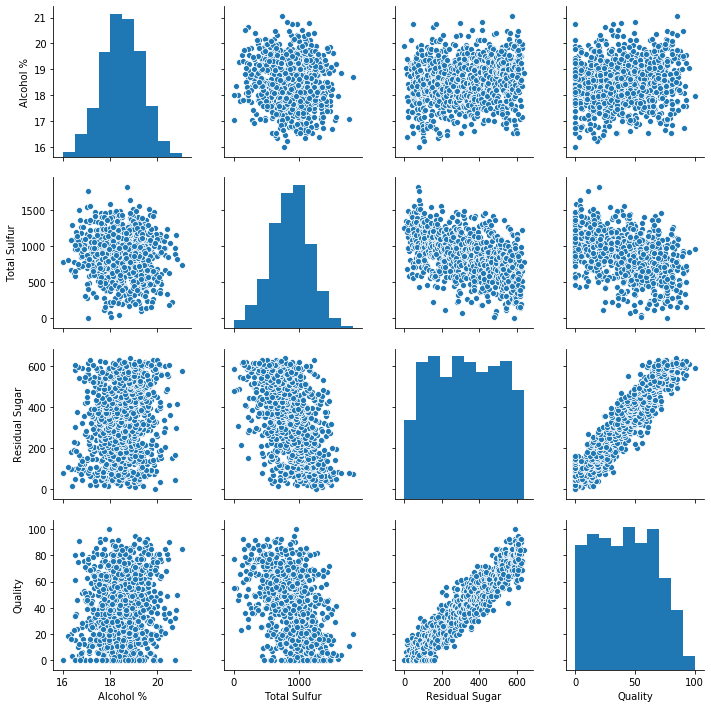

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data_pca_input)

In [14]:
corr = data.corr(method='pearson')

corr

,Wine ref,Alcohol %,Total Sulfur,Residual Sugar,Quality,Class
Wine ref,1.000000,0.164087,-0.482949,0.997449,0.940382,0.877506
Alcohol %,0.164087,1.000000,-0.094103,0.161617,0.141898,0.131881
Total Sulfur,-0.482949,-0.094103,1.000000,-0.484126,-0.454735,-0.424384
Residual Sugar,0.997449,0.161617,-0.484126,1.000000,0.937209,0.874793
Quality,0.940382,0.141898,-0.454735,0.937209,1.000000,0.921505
Class,0.877506,0.131881,-0.424384,0.874793,0.921505,1.000000
